In [157]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [158]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [159]:
max_features = 1000000 # max vocab size

Vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_features,output_mode= 'tf_idf', ngrams=2)

Vectorizer.adapt(np.array(train_df['text']))

#vocab = Vectorizer.get_vocabulary()
#num_tokens = len(vocab)
#print(vocab)

In [160]:
model = tf.keras.Sequential([
    Vectorizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [161]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(1e-3),
             metrics=['accuracy'])

In [162]:
X = train_df['text']
y = train_df['author']

authors_bool = []

for i in y:
    if i == 'EAP':   authors_bool.append([1,0,0])
    elif i == 'HPL': authors_bool.append([0,1,0])
    elif i == 'MWS': authors_bool.append([0,0,1])        
        
X_train, X_test, y_train, y_test = train_test_split(
    X, authors_bool, test_size=0.33, shuffle=True, random_state = 13)

In [163]:
history = model.fit(list(X_train), list(y_train), epochs=5, batch_size=32,
                         validation_data=(list(X_test), list(y_test)),
                         validation_steps=10)

Epoch 1/5
410/410 [==============================] - 19s 43ms/step - loss: 0.5493 - accuracy: 0.7769 - val_loss: 0.4088 - val_accuracy: 0.8313
Epoch 2/5
410/410 [==============================] - 18s 43ms/step - loss: 0.0364 - accuracy: 0.9937 - val_loss: 0.4417 - val_accuracy: 0.8406
Epoch 3/5
410/410 [==============================] - 16s 40ms/step - loss: 0.0054 - accuracy: 0.9995 - val_loss: 0.4590 - val_accuracy: 0.8438
Epoch 4/5
410/410 [==============================] - 14s 34ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4774 - val_accuracy: 0.8469
Epoch 5/5
410/410 [==============================] - 14s 34ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4895 - val_accuracy: 0.8531


In [164]:
predictions = model.predict(X_test)
predictions

array([[1.3882370e-01, 4.9786022e-01, 3.6331612e-01],
       [3.3559736e-02, 9.6532172e-01, 1.1185621e-03],
       [1.4492824e-04, 9.8279542e-01, 1.7059678e-02],
       ...,
       [7.9365313e-01, 5.6474756e-02, 1.4987214e-01],
       [9.8251790e-01, 1.2259111e-02, 5.2229771e-03],
       [9.9313533e-01, 6.2031131e-03, 6.6157326e-04]], dtype=float32)

In [165]:
pred_bool = []

for pred in predictions:
    pred = list(pred)
    max_index = pred.index(max(pred))
    
    for i in range(len(pred)):
        if i == max_index: 
            pred[i] = 1
        else: 
            pred[i] = 0
    pred_bool.append(pred)
    
pred_bool

[[0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1,

In [166]:
def confusion(predictions, test_labels):
    matrix = np.zeros([3,3], dtype=int)
    
    for i, row in enumerate(predictions):
        matrix[np.argmax(row), np.argmax(test_labels[i])] += 1
    
    return matrix


confusion(predictions, y_test)     

array([[2258,  249,  246],
       [ 101, 1452,   52],
       [ 245,  160, 1699]])

Text(33.0, 0.5, 'True')

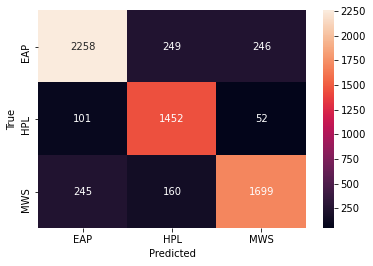

In [167]:
import seaborn as sns

x_axis_labels = ['EAP', 'HPL', 'MWS']
y_axis_labels = ['EAP', 'HPL', 'MWS']

ax = sns.heatmap(confusion(predictions, y_test), xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

In [168]:
mat = confusion(predictions, y_test)

precisions, recalls, f1s = [],[],[]

for i in range(len(mat)):
    row = mat[i]
    col = mat[:,i]
    
    p = row[i] / (sum(row))
    r = col[i] / sum(col)
    f = 2 * ((precision * recall) / (precision + recall))
    
    precisions.append(p)
    recalls.append(r)
    f1s.append(2 * ((p * r) / (p + r)))

In [169]:
data = {'precision':precisions,
        'recall':recalls,
        'f1 score':f1s}
 
df = pd.DataFrame(data, index =['EAP','HPL','MWS'])
df

,precision,recall,f1 score
EAP,0.820196,0.867127,0.843009
HPL,0.904673,0.780226,0.837853
MWS,0.807510,0.850776,0.828578


In [170]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [171]:
test_preds = model.predict(test_df['text'])

In [172]:
submission = pd.DataFrame({
    'id': test_df['id'],
    'EAP': test_preds[:,0],
    'HPL': test_preds[:,1],
    'MWS': test_preds[:,2]
})
submission

,id,EAP,HPL,MWS
0,id02310,0.000332,2.334340e-03,9.973334e-01
1,id24541,1.000000,1.276105e-08,1.078792e-08
2,id00134,0.000056,9.999355e-01,8.445573e-06
3,id27757,0.313265,3.041403e-01,3.825945e-01
4,id04081,0.763095,3.321332e-02,2.036916e-01
...,...,...,...,...
8387,id11749,0.796826,2.297774e-02,1.801961e-01
8388,id10526,0.003586,1.541090e-02,9.810029e-01
8389,id13477,0.999854,1.048849e-05,1.357163e-04
8390,id13761,0.815880,4.222412e-04,1.836977e-01


In [173]:
submission.to_csv('submission.csv', index=False)